# Project 6c - Implicit time integration
Recall the matrix form of the equations
$$
\frac{\partial \mathbf{u}}{\partial t} = A \mathbf{u} + \mathbf{b}.
$$
Note that these have been discretized in space, but not in time.  The standard forward Euler method for time integration would read:

$$
\frac{\mathbf{u}_{t+1} - \mathbf{u}_t}{\Delta t} = A \mathbf{u}_{t} + \mathbf{b}.
$$
This works, but requires satisfaction of the CFL condition (a maximum time step).  However, it would also be reasonable to write
$$
\frac{\mathbf{u}_{t+1} - \mathbf{u}_t}{\Delta t} = A \mathbf{u}_{t+1} + \mathbf{b},
$$
in which we solve for the future *in terms of the future*: this is called the Backward Euler method.  This turns out to be a little bit more challenging to solve, but a whole lot more stable.  To see why it's harder to solve, let's rearrange the equation $u_{t+1}$:
$$
\left(\frac{I}\Delta t - A\right)\mathbf{u_{t+1}} = \frac{\mathbf{u}_t}{\Delta t} + \mathbf{b}, 
$$
where I is an appropriately sized identity matrix.  Previously, we were able to compute the new $\mathbf{u}_{t+1}$ directly, but now it's being multiplied by a matrix.  In particular, we could write
$$
L \mathbf{u}_{t+1} = \mathbf{f},
$$
where $L = \left(\frac{I}{\Delta t} - A\right)$ and $\mathbf{f}=\frac{\mathbf{u}_t}{\Delta t} + \mathbf{b}$.  Solving this system of linear equations gives us our update.  

**Develop a new integration method class called BackwardEuler.**  This takes a bit of modification to the problem class as well, because the integrator needs more than just the right hand side of the equations to compute the new value of $\mathbf{u}$.  You can assume that BackwardEuler will have access to two new methods of the problem class called stiffness_matrix (which returns $A$) and load_vector (which returns $\mathbf{b}$), both of which you'll also need to implement (although this is sort of trivial).  

In [1]:
import numpy as np
import ode_methods as om
import matplotlib.pyplot as plt

class Diffusion:
    def __init__(self, dx, k=0.01):
        self.dx = dx**2
        self.k = k

    def rhs(self, t, u):
        dudt = np.dot(self.stiffness_matrix(), u) + self.load_vector()
        return np.array(dudt).flatten()
    
    def stiffness_matrix(self):
        size = 100
        A = np.zeros((size, size))
        for i in range(size):
            A[i, i] = -2
            if i > 0:
                A[i, i - 1] = 1
            if i < size - 1:
                A[i, i + 1] = 1
        return A
    
    def load_vector(self):
        size = 100
        b = np.zeros(size)
        b[-1] = 2 * self.k / self.dx
        return b

In [2]:
class BackwardEuler:
    def __init__(self):
        pass
    
    def step(self, ode, t, dt, u_0):
        L = np.eye(len(u_0)) / dt - ode.stiffness_matrix()
        f = u_0 / dt + ode.load_vector()
        u_next = np.linalg.solve(L, f)
        return u_next


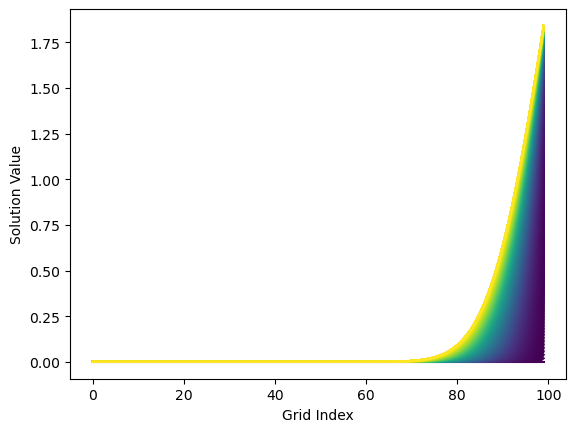

In [18]:
problem = Diffusion(dx=0.1, k=0.01)
method = BackwardEuler()
integrator = om.Integrator(ode=problem, method=method)
t, u = integrator.integrate(interval=[0, 50], dt=0.0001, u_0=np.zeros(100))

# Plotting
cmap = plt.cm.viridis
for tt, uu in zip(t[::100], u[::100]):
    plt.plot(uu, color=cmap(tt/t[-1]))
plt.xlabel('Grid Index')
plt.ylabel('Solution Value')
plt.show()

**Test your function by comparing it to solutions using forward Euler for similar (stable) time steps.  Does it perform as well?**  

**Now try it with increasingly large time steps.  Does it suffer the same fate as forward Euler?  What is the relative downside to using this method versus forward Euler?  

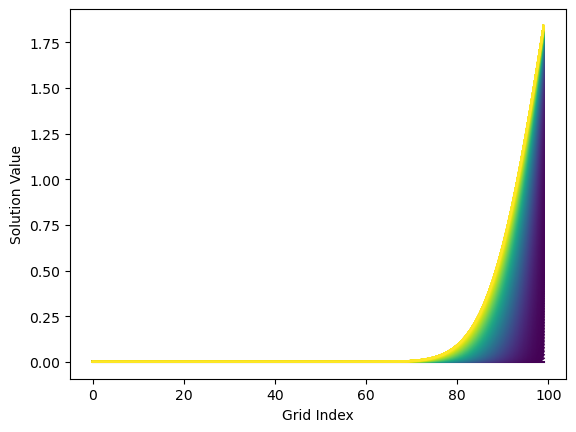

In [17]:
problem = Diffusion(dx=0.1, k=0.01)
method = om.Euler()
integrator = om.Integrator(ode=problem, method=method)
t, u = integrator.integrate(interval=[0, 50], dt=0.0001, u_0=np.zeros(100))

# Plotting
cmap = plt.cm.viridis
for tt, uu in zip(t[::100], u[::100]):
    plt.plot(uu, color=cmap(tt/t[-1]))
plt.xlabel('Grid Index')
plt.ylabel('Solution Value')
plt.show()

**The natural extension of the method described above is to develop a method that computes the steady-state solution, in which the time-derivative is explicitly zero.  Describe and implement a sensible approach.  In particular, consider whether or not the notion of integration through time is even needed anymore.**